In [77]:
import re
import matplotlib.pyplot as plt

def plot_val_losses_wo_saving(log_dict, small_markers=False):
    """
    Plot val_loss vs train_time and val_loss vs step
    for multiple log files.

    Args:
        log_dict (dict[str, str]): mapping from title -> log file path
    """
    pattern = re.compile(r"step:(\d+)/\d+\s+val_loss:(\d+\.\d+(?:e[-+]?\d+)?)\s+train_time:(\d+)ms")

    plt.figure(figsize=(12, 5))

    # --- Plot 1: val_loss vs train_time ---
    plt.subplot(1, 2, 1)
    for title, log_file in log_dict.items():
        data = []
        with open(log_file, "r") as f:
            for line in f:
                match = pattern.search(line)
                if match:
                    step = int(match.group(1))
                    val_loss = float(match.group(2))
                    train_time = int(match.group(3)) / 1000  # seconds
                    data.append((step, train_time, val_loss))

        if data:
            steps, train_times, val_losses = zip(*data)
            plt.plot(train_times[1:], val_losses[1:], marker="o", label=title, linewidth=1.2, markersize=3 if small_markers else 5, linestyle="-", alpha=1)

    plt.xlabel("Train Time (s)")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend()

    # --- Plot 2: val_loss vs step ---
    plt.subplot(1, 2, 2)
    for title, log_file in log_dict.items():
        data = []
        with open(log_file, "r") as f:
            for line in f:
                match = pattern.search(line)
                if match:
                    step = int(match.group(1))
                    val_loss = float(match.group(2))
                    train_time = int(match.group(3)) / 1000
                    data.append((step, train_time, val_loss))

        if data:
            steps, train_times, val_losses = zip(*data)
            plt.plot(steps[1:], val_losses[1:], marker="o", label=title, linewidth=1.2, markersize=3 if small_markers else 5, linestyle="-", alpha=1)
            print(data)

    plt.xlabel("Step")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


GPT-2 Medium:

[(0, 0.0, 10.82584), (125, 27.859, 4.374602), (250, 55.822, 3.881395), (375, 84.299, 3.694823), (500, 113.082, 3.579985), (625, 142.042, 3.502081), (750, 171.426, 3.448399), (875, 200.948, 3.402734), (1000, 230.683, 3.36317), (1125, 260.535, 3.336316), (1250, 290.475, 3.311743), (1375, 320.578, 3.291127), (1500, 350.687, 3.268611), (1625, 380.916, 3.254992), (1750, 411.104, 3.238909), (1875, 441.249, 3.223639), (2000, 471.422, 3.207927), (2125, 501.917, 3.193027), (2250, 532.372, 3.180212), (2375, 562.87, 3.167717), (2500, 593.332, 3.157242), (2625, 623.782, 3.144777), (2750, 654.187, 3.134015), (2875, 684.636, 3.123714), (3000, 715.171, 3.113764), (3125, 745.735, 3.10268), (3250, 776.217, 3.091749), (3375, 806.709, 3.082486), (3500, 837.268, 3.073764), (3625, 867.764, 3.066109), (3750, 898.265, 3.057748), (3875, 928.8, 3.04977), (4000, 959.297, 3.03957), (4125, 989.835, 3.03109), (4250, 1020.369, 3.02289), (4375, 1050.932, 3.015399), (4500, 1081.68, 3.006567), (4625, 1112.517, 2.99775

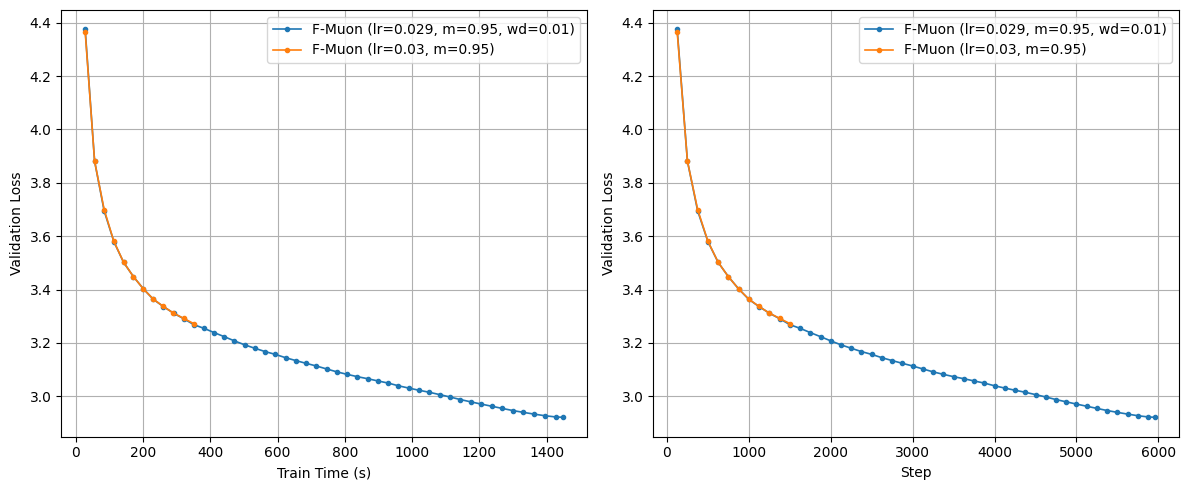

In [90]:
plot_val_losses_wo_saving({#"Muon (lr=0.025, m=0.95, wd=0.01)": "muon_medium.txt",
                
                "F-Muon (lr=0.029, m=0.95, wd=0.01)": "fmuon_full_wd.txt",
                "F-Muon (lr=0.03, m=0.95)": "fmuon_lr_003.txt",
                # "F-Muon (lr=0.029, m=0.95, no wd)": "fmuon_no_wd.txt",
                # "F-Muon (lr=0.029, m=0.95, wd=0.005)": "fmuon_half_wd.txt",
                # "F-Muon (lr=0.029, m=0.95, wd=0.015)": "fmuon_extra_wd.txt"
                # "F-Muon 5980 (lr=0.029, m=0.95, wd=0.01)": "fmuon_5980.txt",
                
                }, small_markers=True
                
)


In [10]:
import re
import matplotlib.pyplot as plt

def plot_val_losses(log_dict):
    """
    Plot val_loss vs wallclock time and val_loss vs step
    for multiple log files.

    Args:
        log_dict (dict[str, str]): mapping from title -> log file path
    """
    pattern = re.compile(r"step:(\d+)/\d+\s+val_loss:(\d+\.\d+(?:e[-+]?\d+)?)\s+train_time:(\d+)ms")

    plt.figure(figsize=(12, 5))

    # --- Plot 1: val_loss vs wallclock time (in minutes) ---
    plt.subplot(1, 2, 1)
    for title, log_file in log_dict.items():
        data = []
        with open(log_file, "r") as f:
            for line in f:
                match = pattern.search(line)
                if match:
                    step = int(match.group(1))
                    val_loss = float(match.group(2))
                    train_time = int(match.group(3)) / 1000 / 60  # convert ms → s → minutes
                    data.append((step, train_time, val_loss))

        if data:
            steps, train_times, val_losses = zip(*data)
            plt.plot(train_times[1:], val_losses[1:], marker="o", label=title,
                     linewidth=1.2, markersize=5, linestyle="-", alpha=1)

    plt.xlabel("Wallclock time (8×H100 minutes)")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend()

    # --- Plot 2: val_loss vs step ---
    plt.subplot(1, 2, 2)
    for title, log_file in log_dict.items():
        data = []
        with open(log_file, "r") as f:
            for line in f:
                match = pattern.search(line)
                if match:
                    step = int(match.group(1))
                    val_loss = float(match.group(2))
                    train_time = int(match.group(3)) / 1000 / 60  # minutes
                    data.append((step, train_time, val_loss))

        if data:
            steps, train_times, val_losses = zip(*data)
            plt.plot(steps[1:], val_losses[1:], marker="o", label=title,
                     linewidth=1.2, markersize=5, linestyle="-", alpha=1)

    plt.xlabel("Step")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


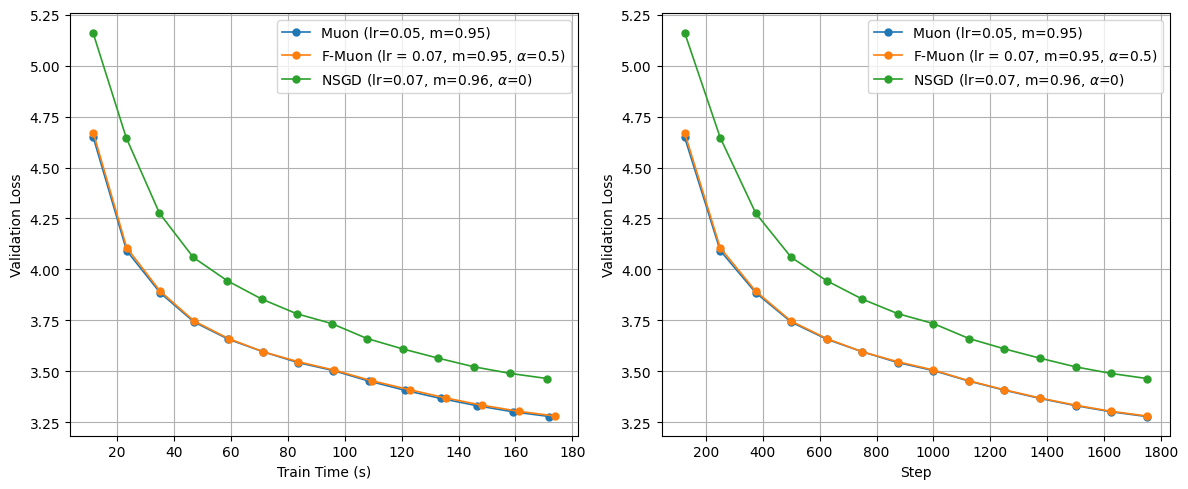

In [13]:
plot_val_losses({"Muon (lr=0.05, m=0.95)": "664f1c87-01af-4a16-b8cd-e7415caadede_baseline.txt",
                # r"F-Muon (lr = 0.07, m=0.96, $\alpha$=0.5)": "1756055159239_007lr_096mom_FMuon.txt",
                r"F-Muon (lr = 0.07, m=0.95, $\alpha$=0.5)": "1756058551408_007lr_095mom.txt",
                # r"F-Muon (lr = 0.05, m=0.95, $\alpha$=-0.1)": "1756059576600_neg_alpha.txt",
                r"NSGD (lr=0.07, m=0.96, $\alpha$=0)" : "1756055424649_007lr_096mom_NSGD.txt"}
                
)


In [75]:
import re
import matplotlib.pyplot as plt

def plot_val_losses(log_dict, output_dir=".", small_markers=False):
    """
    Plot val_loss vs wallclock time and val_loss vs step
    for multiple log files, and save as PDF files.

    Args:
        log_dict (dict[str, str]): mapping from title -> log file path
        output_dir (str): directory to save PDF plots
    """
    pattern = re.compile(r"step:(\d+)/\d+\s+val_loss:(\d+\.\d+(?:e[-+]?\d+)?)\s+train_time:(\d+)ms")

    # --- Plot 1: val_loss vs wallclock time (in minutes) ---
    plt.figure(figsize=(6, 5))
    for title, log_file in log_dict.items():
        data = []
        with open(log_file, "r") as f:
            for line in f:
                match = pattern.search(line)
                if match:
                    step = int(match.group(1))
                    val_loss = float(match.group(2))
                    train_time = int(match.group(3)) / 1000 / 60  # convert ms → s → min
                    data.append((step, train_time, val_loss))

        if data:
            steps, train_times, val_losses = zip(*data)
            plt.plot(train_times[1:], val_losses[1:], marker="o", label=title,
                     linewidth=1.2, markersize=2 if small_markers else 5, linestyle="-", alpha=1)

    plt.xlabel("Wallclock time (8×H100 minutes)")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{output_dir}/val_loss_vs_time.pdf", bbox_inches="tight")
    plt.close()

    # --- Plot 2: val_loss vs step ---
    plt.figure(figsize=(6, 5))
    for title, log_file in log_dict.items():
        data = []
        with open(log_file, "r") as f:
            for line in f:
                match = pattern.search(line)
                if match:
                    step = int(match.group(1))
                    val_loss = float(match.group(2))
                    train_time = int(match.group(3)) / 1000 / 60  # minutes
                    data.append((step, train_time, val_loss))

        if data:
            steps, train_times, val_losses = zip(*data)
            plt.plot(steps[1:], val_losses[1:], marker="o", label=title,
                     linewidth=1.2, markersize=2 if small_markers else 5, linestyle="-", alpha=0.9)

    plt.xlabel("Step")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{output_dir}/val_loss_vs_step.pdf", bbox_inches="tight")
    plt.close()


In [ ]:
plot_val_losses({r"Muon (lr=0.05, m=0.95, $\alpha=1$)": "664f1c87-01af-4a16-b8cd-e7415caadede_baseline.txt",
                # r"F-Muon (lr = 0.07, m=0.96, $\alpha$=0.5)": "1756055159239_007lr_096mom_FMuon.txt",
                r"F-Muon (lr = 0.07, m=0.95, $\alpha$=0.5)": "1756058551408_007lr_095mom.txt",
                r"NSGD (lr=0.10, m=0.95, $\alpha$=0)" : "nsgd_nano.txt",
                r"S-Muon (lr = 0.07, m=0.95, $\alpha$=0.5)":"1764417332211_SMuon_0003.txt",
                r"SignSGD (lr=3e-4, m=0.95, $\alpha$=0)": "1764416827337_sign_sgd_0003.txt"}
                
)
